In [13]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import os
import copy

from torch.distributions import Normal
os.environ["KMP_DUPLICSCORE_LIB_OK"]="TRUE"

In [29]:
def pdf_mixture(components,means,variances, weights, inputs):
    pdf = torch.zeros(len(inputs))

    for i in range(components):
        pdf += weights[i]*Normal(means[i],variances[i]).log_prob(inputs).exp()

    return pdf

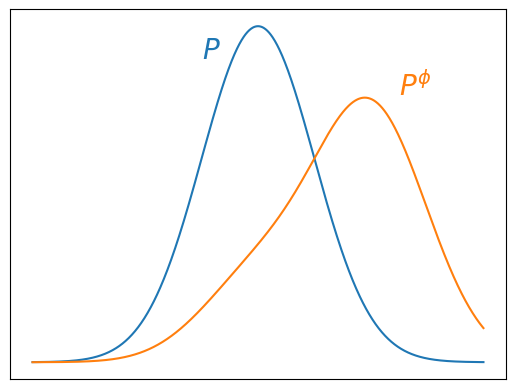

In [81]:
inputs = torch.linspace(-4,4,1000)
Y1 = pdf_mixture(1,[0],[1],[1],inputs)
Y2 = pdf_mixture(2,[0,2],[1,1],[0.25,0.75],inputs)
fig,axs = plt.subplots()
plt.plot(inputs,Y1.detach().numpy(),color = '#1f77b4')
plt.plot(inputs,Y2.detach().numpy(),color = '#ff7f0e')
#plt.annotate(r"$Y(x_1)$", (0,1), xytext=None, xycoords=(0,1))
plt.annotate(r"$P$",
            xy=(0.425, 0.85), xycoords='axes fraction',
            xytext=(0, 0), textcoords='offset pixels',
            horizontalalignment='right',
            verticalalignment='bottom', color = '#1f77b4',
            fontsize = 20)
plt.annotate(r"$P^\phi$",
            xy=(0.85, 0.75), xycoords='axes fraction',
            xytext=(0, 0), textcoords='offset pixels',
            horizontalalignment='right',
            verticalalignment='bottom', color = '#ff7f0e',
            fontsize = 20)
plt.xticks([])
plt.yticks([])
plt.savefig("counterfactual_dist_example0",bbox_inches ="tight")

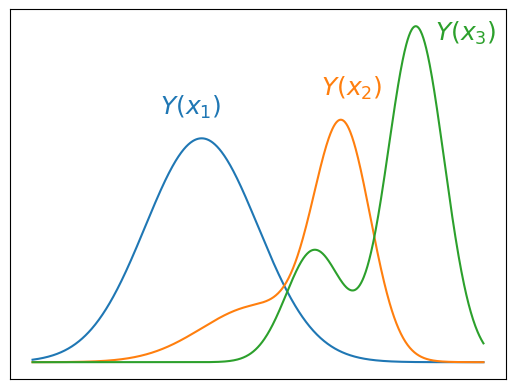

In [95]:
inputs = torch.linspace(-4,4,1000)
Y1 = pdf_mixture(1,[-1],[1],[1],inputs)
Y2 = pdf_mixture(2,[0,1.5,1],[1,0.5,0.5],[0.25,0.5,0.25],inputs)
Y3 = pdf_mixture(2,[1,2.8],[0.5,0.5],[0.25,0.75],inputs)
fig,axs = plt.subplots()
plt.plot(inputs,Y1.detach().numpy(),color = '#1f77b4')
plt.plot(inputs,Y2.detach().numpy(),color = '#ff7f0e')
plt.plot(inputs,Y3.detach().numpy(),color = '#2ca02c')
#plt.annotate(r"$Y(x_1)$", (0,1), xytext=None, xycoords=(0,1))
plt.annotate(r"$Y(x_1)$",
            xy=(0.425, 0.7), xycoords='axes fraction',
            xytext=(0, 0), textcoords='offset pixels',
            horizontalalignment='right',
            verticalalignment='bottom', color = '#1f77b4',
            fontsize = 18)
plt.annotate(r"$Y(x_2)$",
            xy=(0.75, 0.75), xycoords='axes fraction',
            xytext=(0, 0), textcoords='offset pixels',
            horizontalalignment='right',
            verticalalignment='bottom', color = '#ff7f0e',
            fontsize = 18)
plt.annotate(r"$Y(x_3)$",
            xy=(0.98, 0.9), xycoords='axes fraction',
            xytext=(0, 0), textcoords='offset pixels',
            horizontalalignment='right',
            verticalalignment='bottom', color = '#2ca02c',
            fontsize = 18)
plt.xticks([])
plt.yticks([])
plt.savefig("counterfactual_dist_example1",bbox_inches ="tight")